In [11]:
from pytriqs.archive import *
from pytriqs.plot.mpl_interface import *
%matplotlib inline

In [12]:
ar = HDFArchive('anderson_0.5.block.h5','r')
g_cthyb = ar['G_tau']
nn_cthyb = ar['correlator']

In [13]:
ar = HDFArchive('anderson_segment_0.5.block.h5','r')
g_ctseg = ar['G_tau']
nn_ctseg = ar['correlator']
nnw_ctseg = ar['']

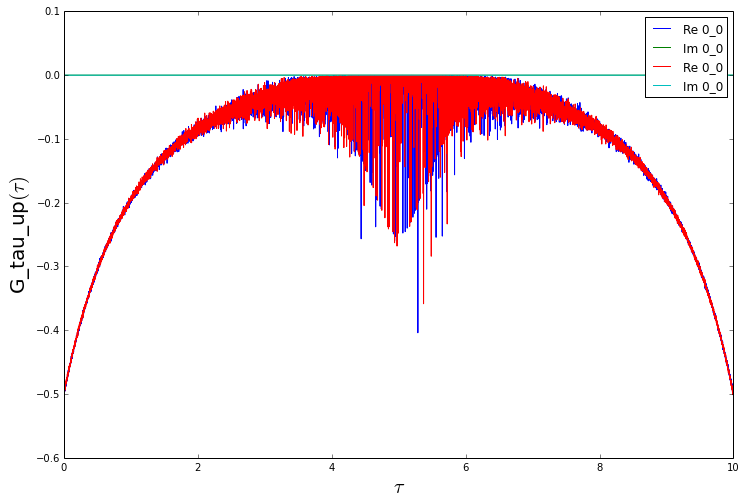

In [6]:
oplot(ar['G_tau'])

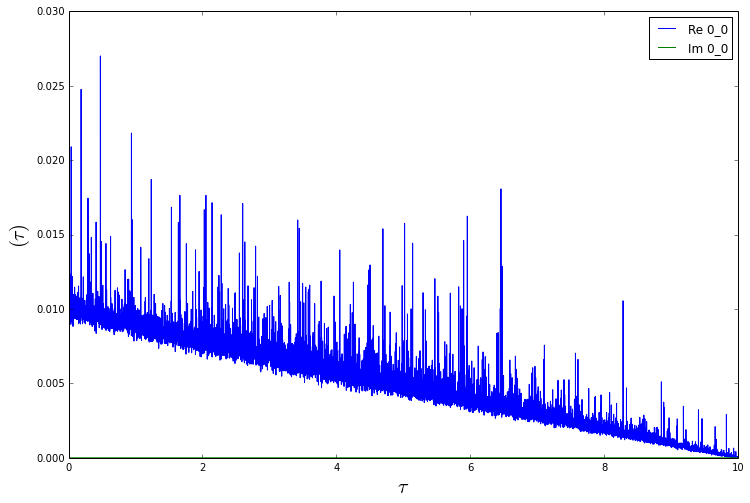

In [14]:
oplot(nn_cthyb)
#oplot(nn_ctseg[0,0])
#oplot(nn_ctseg[0,1])